<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB14_PART_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 14: NEURAL NETWORKS - PART B


Implement a neural network for m-samples, n-features as we discussed in class (both FP and BP) and for N layers in the hidden layer. Split the data (you can use the log. reg. data or any other one) and train your network with 70% of the data. Use 15% for validation  and test your network with the remaining 15% data. Report the evaluation metrics for varying number of layers in the network. Plot the training loss curves.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Define loss function
def mean_squared_loss(y_true, y_hat):
    return np.mean((y_true - y_hat) ** 2)

# Initialize parameters
def initialize_parameters(layer_dims):
    np.random.seed(0)
    parameters = {}
    L = len(layer_dims) - 1  # Number of layers

    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

In [ ]:
# Forward propagation
def forward_propagation(X, parameters, activation_fn='sigmoid'):
    neurons = {}
    neurons['A0'] = X
    L = len(parameters) // 2  # Number of layers

    for l in range(1, L + 1):
        neurons['Z' + str(l)] = np.dot(parameters['W' + str(l)], neurons['A' + str(l - 1)]) + parameters['b' + str(l)]
        if activation_fn == 'sigmoid':
            neurons['A' + str(l)] = sigmoid(neurons['Z' + str(l)])
        elif activation_fn == 'relu':
            neurons['A' + str(l)] = relu(neurons['Z' + str(l)])
        elif activation_fn == 'tanh':
            neurons['A' + str(l)] = tanh(neurons['Z' + str(l)])
    return neurons

# Backward propagation
def backward_propagation(parameters, neurons, X, Y, activation_fn='sigmoid'):
    grads = {}
    L = len(parameters) // 2  # Number of layers
    m = X.shape[1]  # Number of samples

    dZ = neurons['A' + str(L)] - Y

    for l in range(L, 0, -1):
        grads['dW' + str(l)] = (1 / m) * np.dot(dZ, neurons['A' + str(l - 1)].T)
        grads['db' + str(l)] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            if activation_fn == 'sigmoid':
                dZ = np.dot(parameters['W' + str(l)].T, dZ) * neurons['A' + str(l - 1)] * (1 - neurons['A' + str(l - 1)])
            elif activation_fn == 'relu':
                dZ = np.dot(parameters['W' + str(l)].T, dZ) * (neurons['A' + str(l - 1)] > 0)
            elif activation_fn == 'tanh':
                dZ = np.dot(parameters['W' + str(l)].T, dZ) * (1 - np.power(neurons['A' + str(l - 1)], 2))

    return grads

In [ ]:
# Train neural network
def train_nn(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate=0.01, num_iterations=1000, activation_fn='sigmoid'):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []

    for i in range(num_iterations):
        # Forward propagation
        train_output = forward_propagation(X_train, parameters, activation_fn)
        train_loss = mean_squared_loss(Y_train, train_output['A' + str(len(layer_dims) - 1)])

        # Backward propagation
        train_grads = backward_propagation(parameters, train_output, X_train, Y_train, activation_fn)

        # Update parameters
        for l in range(1, len(layer_dims)):
            parameters['W' + str(l)] -= learning_rate * train_grads['dW' + str(l)]
            parameters['b' + str(l)] -= learning_rate * train_grads['db' + str(l)]

        # Evaluate on validation set
        val_output = forward_propagation( X_val, parameters, activation_fn)
        val_loss = mean_squared_loss(Y_val, val_output['A' + str(len(layer_dims) - 1)])

        # Save losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        if i % 10 == 0:
            print("Iteration:", i, "| Training Loss:", train_loss, "| Validation Loss:", val_loss)

    return parameters, train_losses, val_losses

In [ ]:
# Split data into train, validation, and test sets
def split_data(X, Y, train_size=0.7, val_size=0.15, test_size=0.15):
    X_train, X_bar, Y_train, Y_bar = train_test_split(X, Y, test_size=(1 - train_size), random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_bar, Y_bar, test_size=(test_size / (test_size + val_size)), random_state=42)
    return X_train.T, Y_train.T, X_val.T, Y_val.T, X_test.T, Y_test.T

# Load data
data = pd.read_csv('gen_data.csv')
X = data.drop(columns=['y']).values
Y = data['y'].values.reshape(-1, 1)

# Split data
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_data(X, Y)

# Define neural network architecture
input_size = X_train.shape[0]
output_size = 1



Training neural network with 1 hidden layers
Iteration: 0 | Training Loss: 0.7559750696853047 | Validation Loss: 1.044253285133428
Iteration: 10 | Training Loss: 0.6977108938746858 | Validation Loss: 0.9051803953886125
Iteration: 20 | Training Loss: 0.6726848654604987 | Validation Loss: 0.8277613867251656
Iteration: 30 | Training Loss: 0.6605238166837855 | Validation Loss: 0.7805326990545132
Iteration: 40 | Training Loss: 0.6536598573503775 | Validation Loss: 0.7491172516029995
Iteration: 50 | Training Loss: 0.6491945643646617 | Validation Loss: 0.7266987981298687
Iteration: 60 | Training Loss: 0.645929078904597 | Validation Loss: 0.7097930398445416
Iteration: 70 | Training Loss: 0.6433276909851037 | Validation Loss: 0.6964840161316148
Iteration: 80 | Training Loss: 0.6411337806288605 | Validation Loss: 0.6856497877819379
Iteration: 90 | Training Loss: 0.639216148131275 | Validation Loss: 0.6765975458990573
Iteration: 100 | Training Loss: 0.637502968595711 | Validation Loss: 0.6688795

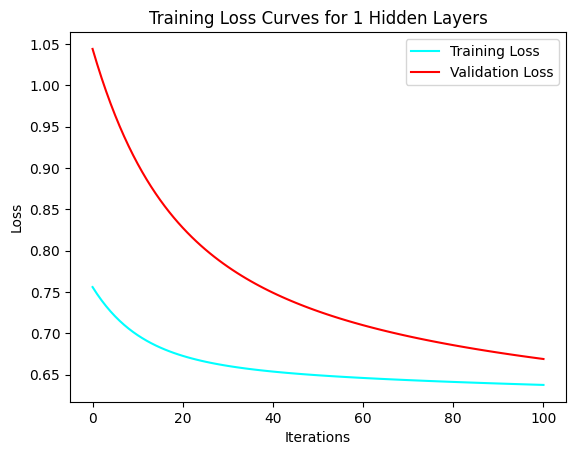

For 1 hidden layers: 
Test Loss: 0.7989470465508685
Test Accuracy: 0.4

Training neural network with 2 hidden layers
Iteration: 0 | Training Loss: 0.7585900464044599 | Validation Loss: 1.0336315422172937
Iteration: 10 | Training Loss: 0.6791053427580572 | Validation Loss: 0.8388935798139098
Iteration: 20 | Training Loss: 0.6646105116449352 | Validation Loss: 0.7748164846021772
Iteration: 30 | Training Loss: 0.6612959835917303 | Validation Loss: 0.7481534177201056
Iteration: 40 | Training Loss: 0.6603983103007975 | Validation Loss: 0.7352899997713499
Iteration: 50 | Training Loss: 0.6601297245058179 | Validation Loss: 0.7285557417291738
Iteration: 60 | Training Loss: 0.6600440756114869 | Validation Loss: 0.7248659531148223
Iteration: 70 | Training Loss: 0.6600151416560424 | Validation Loss: 0.7227911055836577
Iteration: 80 | Training Loss: 0.6600044527501951 | Validation Loss: 0.7216064382332549
Iteration: 90 | Training Loss: 0.6599997598753878 | Validation Loss: 0.7209235635733819
Iter

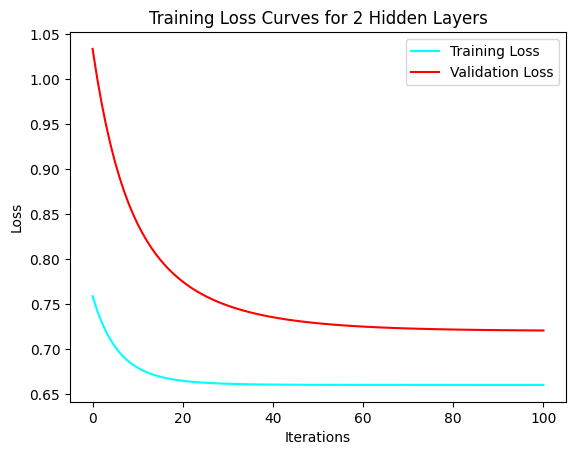

For 2 hidden layers: 
Test Loss: 0.8810616312289609
Test Accuracy: 0.4

Training neural network with 3 hidden layers
Iteration: 0 | Training Loss: 0.7630759546440402 | Validation Loss: 1.0247031350941085
Iteration: 10 | Training Loss: 0.6691649850305488 | Validation Loss: 0.7962275435323285
Iteration: 20 | Training Loss: 0.661260740899516 | Validation Loss: 0.7469472674019066
Iteration: 30 | Training Loss: 0.660212110624802 | Validation Loss: 0.7308577144080945
Iteration: 40 | Training Loss: 0.6600389387992203 | Validation Loss: 0.7246048171738904
Iteration: 50 | Training Loss: 0.6600076038110747 | Validation Loss: 0.7219952310072945
Iteration: 60 | Training Loss: 0.6600017066936956 | Validation Loss: 0.7208726783080317
Iteration: 70 | Training Loss: 0.6600005766473571 | Validation Loss: 0.7203834219913618
Iteration: 80 | Training Loss: 0.6600003573466723 | Validation Loss: 0.7201689565357209
Iteration: 90 | Training Loss: 0.6600003135681226 | Validation Loss: 0.7200747076786965
Iterat

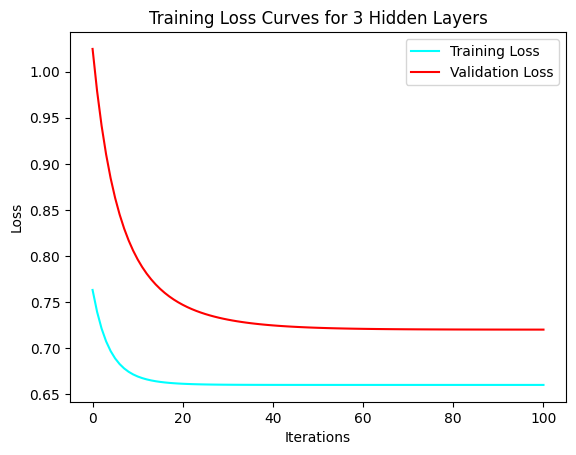

For 3 hidden layers: 
Test Loss: 0.8800662426101503
Test Accuracy: 0.4

Training neural network with 4 hidden layers
Iteration: 0 | Training Loss: 0.7595364052081963 | Validation Loss: 1.001195420693416
Iteration: 10 | Training Loss: 0.6642692768853277 | Validation Loss: 0.7689600976047077
Iteration: 20 | Training Loss: 0.6603486662257009 | Validation Loss: 0.7335543095546496
Iteration: 30 | Training Loss: 0.6600349757014318 | Validation Loss: 0.7242542746255477
Iteration: 40 | Training Loss: 0.6600037480581207 | Validation Loss: 0.7213868829056531
Iteration: 50 | Training Loss: 0.6600004190802119 | Validation Loss: 0.7204576792991578
Iteration: 60 | Training Loss: 0.6600000562042403 | Validation Loss: 0.7201516585179857
Iteration: 70 | Training Loss: 0.6600000163531334 | Validation Loss: 0.7200503368148776
Iteration: 80 | Training Loss: 0.6600000119632844 | Validation Loss: 0.7200167306086456
Iteration: 90 | Training Loss: 0.6600000114771748 | Validation Loss: 0.7200055776404939
Itera

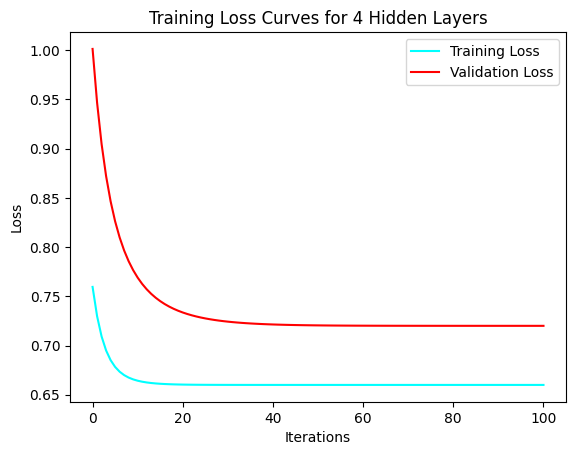

For 4 hidden layers: 
Test Loss: 0.8800037357568016
Test Accuracy: 0.4

Training neural network with 5 hidden layers
Iteration: 0 | Training Loss: 0.7644102110768907 | Validation Loss: 0.9911247038790802
Iteration: 10 | Training Loss: 0.6620263575764558 | Validation Loss: 0.7520196519861233
Iteration: 20 | Training Loss: 0.6600925957377762 | Validation Loss: 0.7267152229969072
Iteration: 30 | Training Loss: 0.6600051181525642 | Validation Loss: 0.7215725125839008
Iteration: 40 | Training Loss: 0.6600002948204177 | Validation Loss: 0.7203775103637227
Iteration: 50 | Training Loss: 0.6600000164870541 | Validation Loss: 0.7200911651249736
Iteration: 60 | Training Loss: 0.6600000002502144 | Validation Loss: 0.7200220459998586
Iteration: 70 | Training Loss: 0.659999999300571 | Validation Loss: 0.7200053322010733
Iteration: 80 | Training Loss: 0.6599999992449999 | Validation Loss: 0.7200012888826544
Iteration: 90 | Training Loss: 0.6599999992417458 | Validation Loss: 0.7200003106420716
Itera

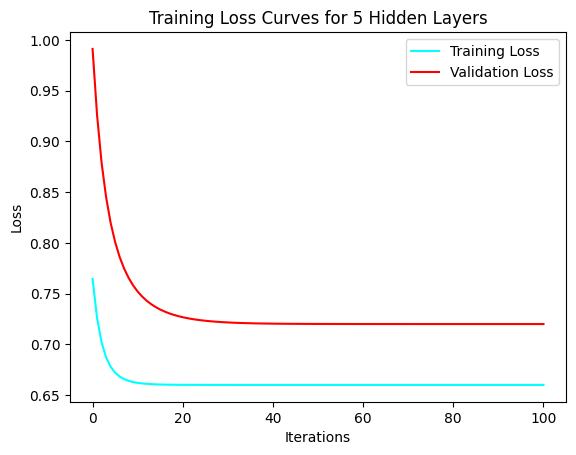

For 5 hidden layers: 
Test Loss: 0.8800001485005395
Test Accuracy: 0.4

Training neural network with 6 hidden layers
Iteration: 0 | Training Loss: 0.7328449870898179 | Validation Loss: 0.926791992489029
Iteration: 10 | Training Loss: 0.6608381449389584 | Validation Loss: 0.7398010618157841
Iteration: 20 | Training Loss: 0.6600239396917342 | Validation Loss: 0.7233131237966939
Iteration: 30 | Training Loss: 0.6600007925179668 | Validation Loss: 0.7206017972651623
Iteration: 40 | Training Loss: 0.6600000269316288 | Validation Loss: 0.7201109056983592
Iteration: 50 | Training Loss: 0.6600000009183773 | Validation Loss: 0.720020493229066
Iteration: 60 | Training Loss: 0.6600000000301096 | Validation Loss: 0.7200037885963398
Iteration: 70 | Training Loss: 0.6599999999997505 | Validation Loss: 0.7200007004509406
Iteration: 80 | Training Loss: 0.6599999999987126 | Validation Loss: 0.7200001294916178
Iteration: 90 | Training Loss: 0.6599999999986771 | Validation Loss: 0.7200000239263107
Iterat

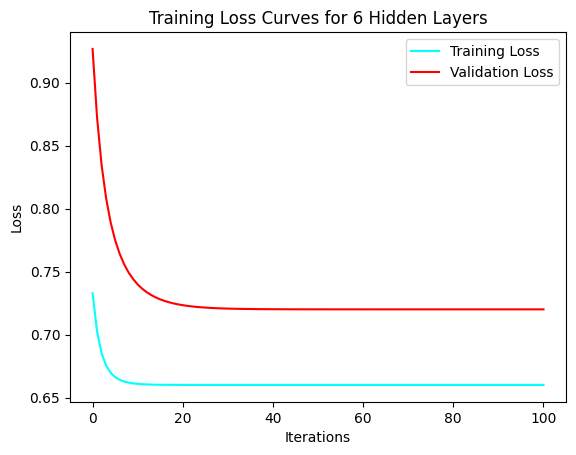

For 6 hidden layers: 
Test Loss: 0.8800000088156498
Test Accuracy: 0.4

Training neural network with 7 hidden layers
Iteration: 0 | Training Loss: 0.7579178654799038 | Validation Loss: 0.9491653661303647
Iteration: 10 | Training Loss: 0.6604685747686906 | Validation Loss: 0.7342137018815886
Iteration: 20 | Training Loss: 0.6600069669125286 | Validation Loss: 0.7217247932590029
Iteration: 30 | Training Loss: 0.6600001178892316 | Validation Loss: 0.7202242319399375
Iteration: 40 | Training Loss: 0.6600000020281688 | Validation Loss: 0.7200294070946988
Iteration: 50 | Training Loss: 0.6600000000352156 | Validation Loss: 0.720003861025333
Iteration: 60 | Training Loss: 0.6600000000008595 | Validation Loss: 0.7200005070113438
Iteration: 70 | Training Loss: 0.6600000000002669 | Validation Loss: 0.7200000665789148
Iteration: 80 | Training Loss: 0.6600000000002568 | Validation Loss: 0.7200000087422319
Iteration: 90 | Training Loss: 0.6600000000002566 | Validation Loss: 0.7200000011472152
Itera

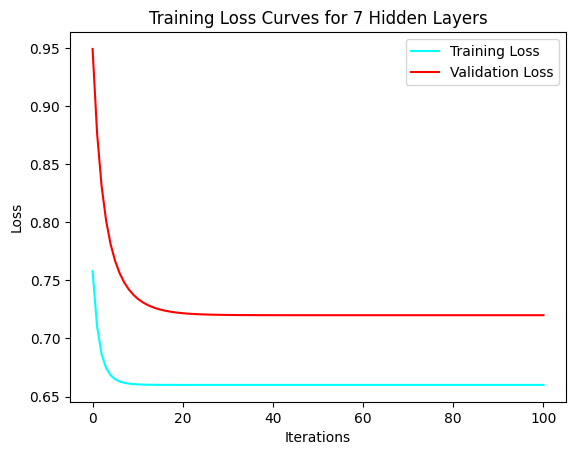

For 7 hidden layers: 
Test Loss: 0.8800000002995357
Test Accuracy: 0.4

Training neural network with 8 hidden layers
Iteration: 0 | Training Loss: 0.7415737917640589 | Validation Loss: 0.913410898848148
Iteration: 10 | Training Loss: 0.6602122362769509 | Validation Loss: 0.729244072911186
Iteration: 20 | Training Loss: 0.6600017930656058 | Validation Loss: 0.7208484373313481
Iteration: 30 | Training Loss: 0.6600000166923635 | Validation Loss: 0.7200818511342619
Iteration: 40 | Training Loss: 0.6600000001566693 | Validation Loss: 0.7200079337675962
Iteration: 50 | Training Loss: 0.6600000000013093 | Validation Loss: 0.7200007693650111
Iteration: 60 | Training Loss: 0.6599999999998483 | Validation Loss: 0.7200000746110377
Iteration: 70 | Training Loss: 0.6599999999998345 | Validation Loss: 0.7200000072353532
Iteration: 80 | Training Loss: 0.6599999999998343 | Validation Loss: 0.7200000007013794
Iteration: 90 | Training Loss: 0.6599999999998345 | Validation Loss: 0.7200000000677259
Iterat

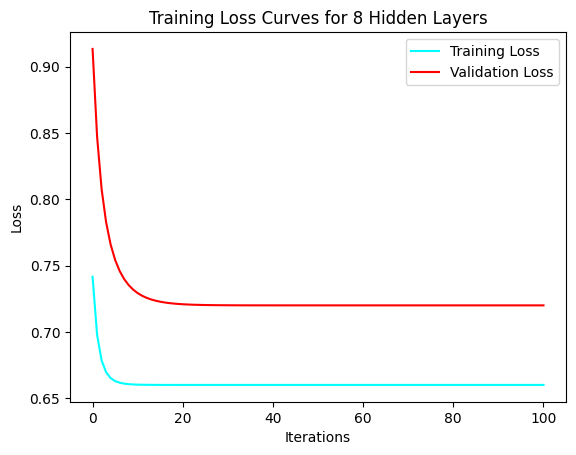

For 8 hidden layers: 
Test Loss: 0.8800000000127064
Test Accuracy: 0.4

Training neural network with 9 hidden layers
Iteration: 0 | Training Loss: 0.759484174714987 | Validation Loss: 0.9218278538985564
Iteration: 10 | Training Loss: 0.6601157550013136 | Validation Loss: 0.7265890621807589
Iteration: 20 | Training Loss: 0.6600005140976165 | Validation Loss: 0.7204393340013644
Iteration: 30 | Training Loss: 0.660000002468943 | Validation Loss: 0.7200304468122978
Iteration: 40 | Training Loss: 0.660000000011925 | Validation Loss: 0.7200021156040313
Iteration: 50 | Training Loss: 0.6600000000000621 | Validation Loss: 0.7200001470301748
Iteration: 60 | Training Loss: 0.6600000000000049 | Validation Loss: 0.7200000102184327
Iteration: 70 | Training Loss: 0.6600000000000046 | Validation Loss: 0.7200000007101751
Iteration: 80 | Training Loss: 0.6600000000000045 | Validation Loss: 0.7200000000493617
Iteration: 90 | Training Loss: 0.6600000000000048 | Validation Loss: 0.7200000000034358
Iterati

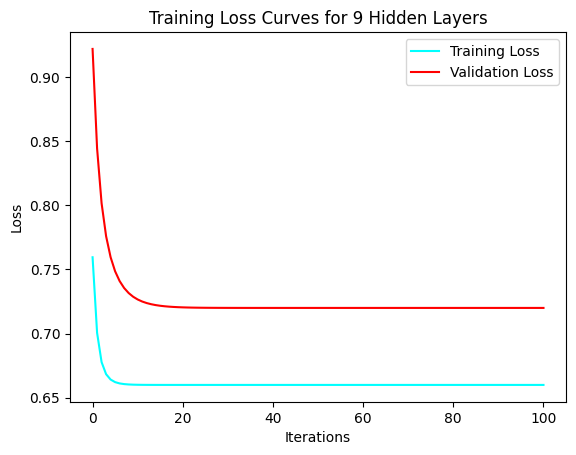

For 9 hidden layers: 
Test Loss: 0.8800000000004831
Test Accuracy: 0.4

Training neural network with 10 hidden layers
Iteration: 0 | Training Loss: 0.7391864722628237 | Validation Loss: 0.8856263946766194
Iteration: 10 | Training Loss: 0.6600492020073421 | Validation Loss: 0.7241517693543716
Iteration: 20 | Training Loss: 0.6600001155746541 | Validation Loss: 0.7202015033591733
Iteration: 30 | Training Loss: 0.6600000002867314 | Validation Loss: 0.7200100373311308
Iteration: 40 | Training Loss: 0.6600000000007132 | Validation Loss: 0.7200005006229475
Iteration: 50 | Training Loss: 0.6600000000000018 | Validation Loss: 0.7200000249707161
Iteration: 60 | Training Loss: 0.6599999999999999 | Validation Loss: 0.7200000012455254
Iteration: 70 | Training Loss: 0.6599999999999999 | Validation Loss: 0.720000000062126
Iteration: 80 | Training Loss: 0.6600000000000001 | Validation Loss: 0.7200000000030988
Iteration: 90 | Training Loss: 0.6599999999999999 | Validation Loss: 0.7200000000001545
Iter

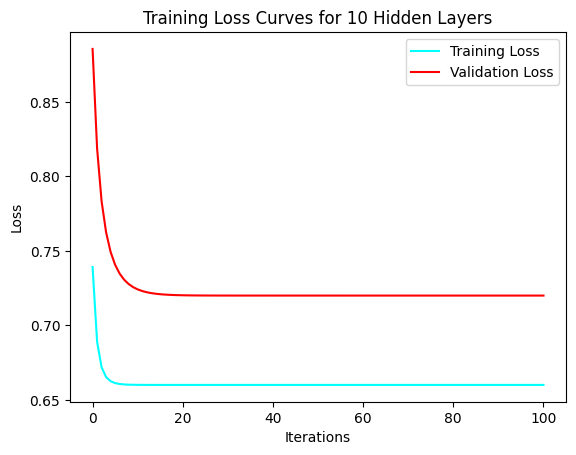

For 10 hidden layers: 
Test Loss: 0.8800000000000152
Test Accuracy: 0.4


In [ ]:
# Train and evaluate neural network for different number of hidden layers
training_loss = []
for n in range(1,11):
    print(f"\nTraining neural network with {n} hidden layers")
    layer_dims = [input_size] #+ [64]*n + [output_size]
    x = 64
    for i in range(1, n+1):
      layer_dims.append(x*i)
    layer_dims.append(output_size)
    parameters, train_losses, val_losses = train_nn(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate=0.01, num_iterations=101, activation_fn='sigmoid')
    training_loss.append(train_losses[-1])
    # Plot training loss curves
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss', color='cyan')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss Curves for ' + str(len(layer_dims) - 2) + ' Hidden Layers')
    plt.legend()
    plt.show()

    # Test neural network on test set
    test_cache = forward_propagation(parameters, X_test, 'sigmoid')
    test_loss = mean_squared_loss(Y_test, test_cache['A' + str(len(layer_dims) - 1)])
    test_predictions = (test_cache['A' + str(len(layer_dims) - 1)] > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    test_accuracy = accuracy_score(Y_test.flatten(), test_predictions.flatten())
    print(f"For {n} hidden layers: ")
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
